# TP  Gradient projeté et gradient conditionnelle (aka Franke-Wolfe)

On cherche dans ce TP à illustrer le comportement de ces deux algos sur un prob
lème jouet

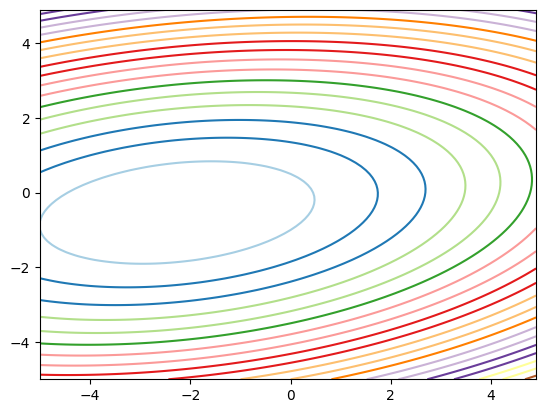

In [30]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Oct 21 14:17:49 2024

@author: mberar
"""

import numpy as np
import itertools
import matplotlib.pyplot as plt
plt.close("all")

def mesh(x_min,x_max,y_min,y_max, h = 0.1):
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

H = np.array([[1,-0.5],[-0.5,4]])
b = np.array([2,1])
c = 3

def cout(x):
    return 0.5*x@(H@x) + x@b + c

# Z contient tout les points de la grille -5,5
xx, yy  = mesh(-5,5,-5,5)
Cost = np.zeros(xx.shape)

for z in itertools.product(range(len(xx)),range(len(yy))):
    Cost[z] = cout(np.array([xx[z],yy[z]]))

plt.figure(1)
plt.contour(xx, yy, Cost, 20, cmap=plt.cm.Paired)
plt.show()

La fonction objective que l'on cherche à optimiser est une fonction 2D
définie par sa Hessienne H, b et c.

Afficher les courbes de niveau de cette fonction

Affichez sur cette figure les frontieres de la contraintes suivante

1.  la courbe $\|x\|_2 = 3$

Implémenter un algorithme de gradient projété, avec un backtracking du pas, pour ces deux contraintes 
et tracer l'évolution de $w$ sur ce graphe

In [55]:
def Projection(y,z):
    if np.linalg.norm(y)<=z:
        return y
    else:
        return (y/np.linalg.norm(y))*z

In [15]:
def backtrak(x_k,cout,Projection,d,sig):
    rho=0.4
    c=1e-4
    f_x=cout(x_k)
    while(cout(Projection(x_k+sig*d,3))>f_x-c*sig*d@d) :
        sig=sig*rho
    return sig

In [24]:
def gradient(x_0):
    return H@x_0+b

In [53]:
#Choice methode backtack or golden_search or fix point
def ajouter_xlist_flist(xlist,flist,nlist,x_0):
    nlist.append(np.linalg.norm(gradient(x_0)))
    xlist.append(x_0)
    flist.append(cout(x_0))
    
def methode_desscente(x_0,cout,Projection,gradient,epsilon=1e-6,max_iter=1e5,rho=1e-3,c_=1e-4,sig=2):
    k=0
    xlist=[]
    flist=[]
    nlist=[]
    ajouter_xlist_flist(xlist,flist,nlist,x_0)
    d_k=-gradient(x_0)
    step=backtrak(x_0,cout,Projection,d_k,sig)
    x_0=Projection(x_0+step*d_k,3)
    k=k+1
    ajouter_xlist_flist(xlist,flist,nlist,x_0)
    while np.abs(flist[-2]-flist[-1])>epsilon and k<max_iter:
        d_k=-gradient(x_0)
        step=backtrak(x_0,cout,Projection,d_k,sig)
        x_0=Projection(x_0+step*d_k,3)
        k=k+1
        ajouter_xlist_flist(xlist,flist,nlist,x_0)
    return xlist,flist,nlist

test


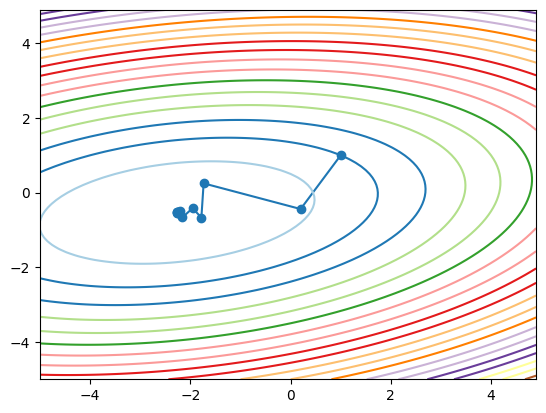

In [61]:
# inserer votre code ici
xx, yy  = mesh(-5,5,-5,5)
xlist,flist,nlist =  methode_desscente(x_0,cout,Projection,gradient,epsilon=1e-6,max_iter=1e5,rho=1e-3,c_=1e-4,sig=2)
xlist = np.array(xlist)
plt.figure(1)
plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
plt.contour(xx, yy, Cost, 20, cmap=plt.cm.Paired)
plt.show()

In [4]:
nb_iter = 100
w = np.random.randn(2)*3
m_cout = np.zeros(nb_iter)
mat_w = np.zeros((nb_iter,2))
beta = 0.9
c = 0.5
tho = 1
for i in range(nb_iter):    
  # inserer votre code ici
  
  
plt.plot(mat_w[:,0],mat_w[:,1],'r')

IndentationError: expected an indented block (<ipython-input-4-775f7e668352>, line 12)

# Algorithme de Franke-Wolfe

On cherche à apprendre un modèle de régression sous contrainte de norme $\ell_1$. On cherche
donc à résoudre le probleme
$$
\min_w \frac{1}{2} \|y - Xw\|_2^2  \quad \text{sc} \quad \|w\|_1 \leq \tau
$$

en sachant que 
$$
z = \arg\min_z a^\top z \quad \|w\|_1 \leq \tau
$$
avec $z = -\tau sign(a_k) e_{i_k}$ et $i_k = \arg\max_k |a_k|$


1.   Implémenter l'algorithme de Franke-wolfe correspondant
2.   Appliquer cette algorithme aux données diabetes du TP de regression de ML.
3.   Analyser la forme du minimiseur en fonction de $\tau$
4.   Commenter la solution





In [ ]:
data = 'diabetes'

if data is 'boston':
    data = datasets.load_boston(True)
else:
    data = datasets.load_diabetes(True)
    
# inserer votre code



#------------------------
nb_iter = 100
w = np.random.rand(d)*0.04
m_cout = np.zeros(nb_iter)
tau = 
e = np.zeros(d)
for k in range(nb_iter):    
    # inserer votre code

In [23]:
H@np.ones(2)*4

array([0.5, 3.5])